In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
os.listdir('.')

['0219QRcode.ipynb',
 '0219QRreader.py',
 '0219sudoku.ipynb',
 '0220Chess.ipynb',
 'Chess',
 'karina.jpg',
 'qrcode.png',
 'qrcode2.png',
 'seven.png',
 'sudoku.png']

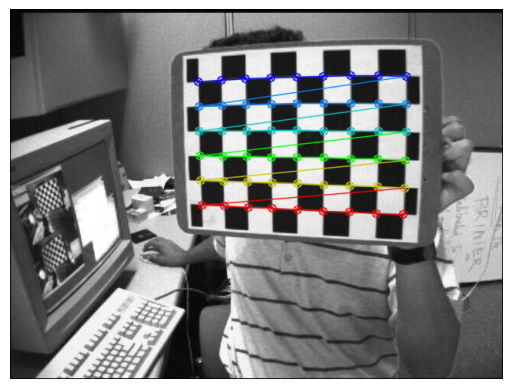

In [31]:
image = cv2.imread('C:\\study\\openCV\\Chess\\left01.jpg')
board_size=(9, 6)

h, w, _ = image.shape #이미지의 높이, 너비, 채널 수 (BGR이라 3, 무시)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, corners = cv2.findChessboardCorners(gray, board_size)
# 이미지에서 체스보드 코너를 자동으로 찾음
# _ -> 성공여부 (True, False) / corners -> 검출된 코너 좌표 배열

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_COUNT, 40, 0.001)
corners = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)

dst = image.copy()
cv2.drawChessboardCorners(dst, board_size, corners, True)


plt.imshow(dst, cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
corners.shape
# 총 코너의 수 = 9x6 = 54 

(54, 1, 2)

In [12]:
dst.shape

(480, 640, 3)

In [ ]:
board_size
#가로 9, 세로 6

(9, 6)

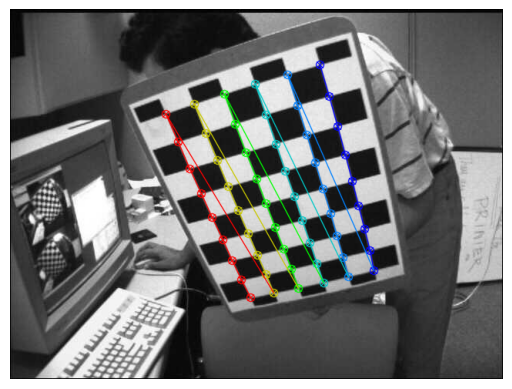

In [32]:
# 체스보드의 실제 3D 좌표를 만드는

squareSize = 1
boardPoints = [] #실세계 좌표값, 보드의 코너를 (0, 0, 0)으로 했을 때의
for y in range(board_size[1]): # 세로 6 
    for x in range(board_size[0]): # 가로 9
        boardPoints.append((x * squareSize, y * squareSize, 0))
boardPoints = np.array(boardPoints, np.float32)

imagePoints = []
objectPoints = []

# for i in range(13):
#     image = cv2.imread(f'left{i+1:02d}.jpg')

##

chess_dir = 'C:\\study\\openCV\\Chess'

images = []
for file in os.listdir(chess_dir):
    image = cv2.imread(os.path.join(chess_dir, file))
    if image is None:
        continue
    images.append(image)
    h, w, _ = image.shape

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, board_size)
    if not ret:
        continue

    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_COUNT, 40, 0.001)
    corners = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)
    dst = image.copy()
    cv2.drawChessboardCorners(dst, board_size, corners, True)
    imagePoints.append(corners)
    objectPoints.append(boardPoints)
    plt.imshow(dst)
    plt.axis('off')



_, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objectPoints, imagePoints, (w, h), None, None)
nuCameraMatrix, unknown = cv2.getOptimalNewCameraMatrix(cameraMatrix, distCoeffs, (w, h), 0)
# mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
map1, map2 = cv2.initUndistortRectifyMap(cameraMatrix, distCoeffs, None, nuCameraMatrix, (w, h), cv2.CV_32F)

In [37]:
tvecs[0]

array([[-3.01578543],
       [-4.30574439],
       [15.89897694]])

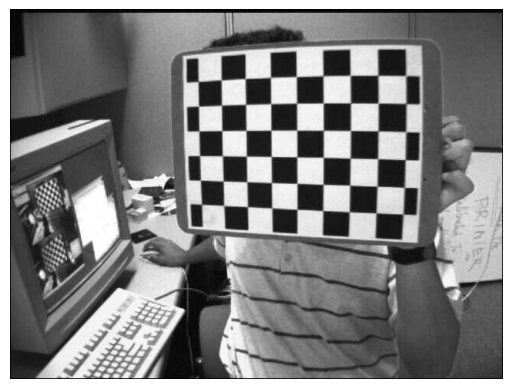

In [45]:
plt.imshow(images[0], cmap = 'gray')
plt.axis('off')
plt.show()

In [38]:
# 6. 도출된 외부 파라미터를 이용해 윗면 3D 좌표를 2D 이미지 좌표로 투영
wp = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
]).astype(np.float32).reshape(-1, 1, 3)
ips, _ = cv2.projectPoints(wp, rvecs[0], tvecs[0], cameraMatrix, distCoeffs)
ips

array([[[244.52328,  94.0407 ]],

       [[274.3154 ,  92.11427]],

       [[244.97531, 126.20642]],

       [[258.04846,  96.4752 ]]], dtype=float32)

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

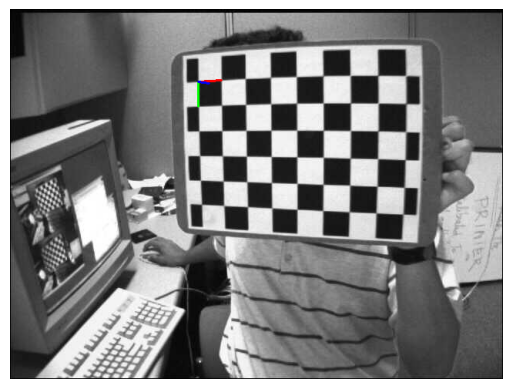

In [41]:
dst = images[0].copy()
colors = [
    (0, 0, 0),
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255)
]
for i in range(1, 4):
    p1 = ips[0, 0].astype(int)
    p2 = ips[i, 0].astype(int)
    cv2.line(dst, p1, p2, colors[i], 2)
    
plt.imshow(dst)
plt.axis('off')

In [46]:
f = open('calib.dat', 'wb')
np.save(f, map1)
np.save(f, map2)
f.close()

In [47]:
f = open('calib.dat', 'rb')
map1 = np.load(f)
map2 = np.load(f)

In [48]:
map1.shape

(480, 640)

In [56]:
image = cv2.imread('C:\\study\\openCV\\Chess\\saved\\142435.jpg')